In [104]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
# reading the data
file_path = os.path.join('..','data', 'autos.csv')
df = pd.read_csv(file_path,encoding="latin-1")
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [106]:
# checking for null values in column: vehicleType
df["vehicleType"].isnull().sum()


37869

In [107]:
# replacing the 'Nan' values to 'Other'
df["vehicleType"].fillna("Other", inplace=True)
df["vehicleType"].isnull().values.sum()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_29912\873782173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["vehicleType"].fillna("Other", inplace=True)


0

In [108]:
# checking for null values in column: Seller
df["seller"].isnull().sum()

0

In [109]:
# checking for null values in column: Brand
df["brand"].isnull().sum()

0

In [110]:
# checking for null values in column: offerType
df["offerType"].isnull().sum()

0

In [111]:
# checking different values in column: offerType
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [112]:
# translating values to English
df["offerType"] = df["offerType"].map({'Gesuch':"Request",'Angebot':'Offer'})

In [113]:
# check
df["offerType"].unique()

array(['Offer', 'Request'], dtype=object)

In [114]:
# checking for null values in column: yearOfRegistration
df["yearOfRegistration"].isnull().sum()

0

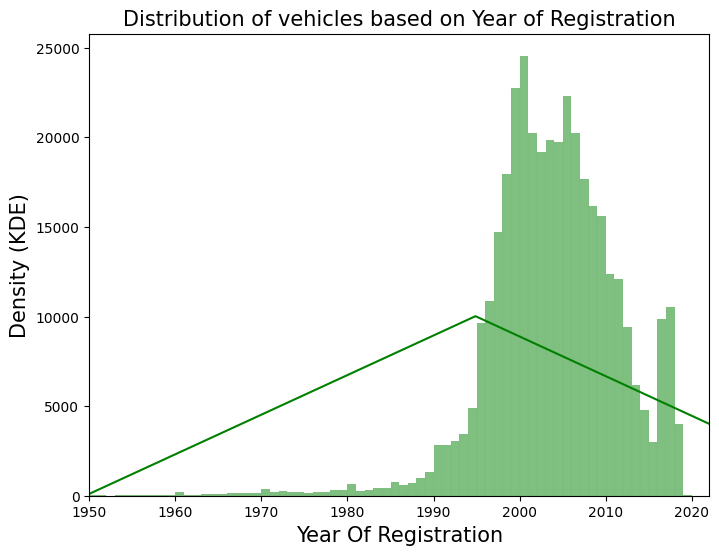

In [115]:
# plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the distribution of yearOfRegistration with KDE
sns.histplot(df["yearOfRegistration"], kde=True, color="g", ax=ax, binwidth=1)

# setting titles and labels
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize=15)
ax.set_ylabel("Density (KDE)", fontsize=15)
ax.set_xlabel("Year Of Registration", fontsize=15)

ax.set_xlim(1950, 2022)

plt.show()

In [116]:
unique_years = df["yearOfRegistration"].unique()
sorted_unique_years = sorted(unique_years)
print(sorted_unique_years)

[1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500, 1600, 1602, 1688, 1800, 1910, 1911, 1915, 1919, 1920, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000, 3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555, 5600, 5900, 5911, 6000, 6200, 6500, 7000, 7100, 7500, 7777, 7800, 8000, 8200, 8455, 8500, 8888, 9000, 9229, 9450, 9996, 9999]


In [117]:
# removing data before 1900 and after 2016 as data incorrect with years. 
# dataset was scraped in 2016 so years after also incorrect.
df = df[(df["yearOfRegistration"] >= 1900) & (df["yearOfRegistration"] <= 2016)]

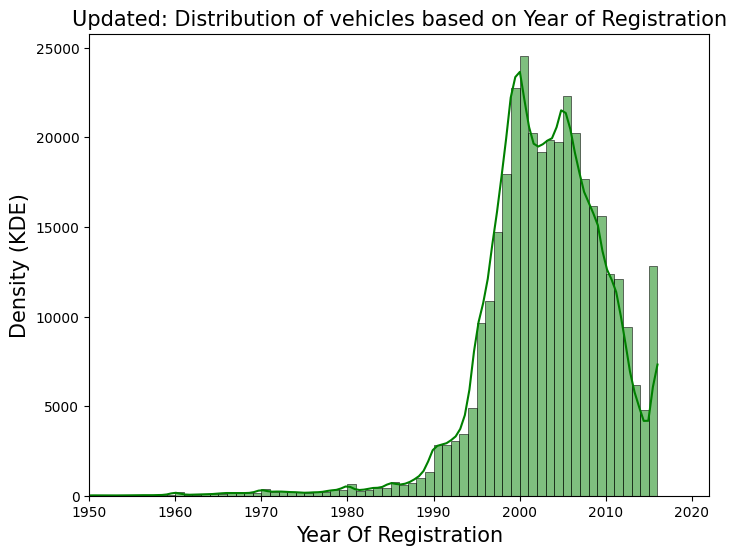

In [118]:
# plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# plotting the distribution of yearOfRegistration with KDE
sns.histplot(df["yearOfRegistration"], kde=True, color="g", ax=ax, binwidth=1)

# setting titles and labels
ax.set_title('Updated: Distribution of vehicles based on Year of Registration', fontsize=15)
ax.set_ylabel("Density (KDE)", fontsize=15)
ax.set_xlabel("Year Of Registration", fontsize=15)

ax.set_xlim(1950, 2022)

plt.show()

In [119]:
# checking for null values in column: gearbox
df["gearbox"].isnull().sum()

18267

In [120]:
# # replacing the 'Nan' values to 'Unspecified'
df["gearbox"].fillna("Unspecified", inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_29912\3758023726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gearbox"].fillna("Unspecified", inplace=True)


In [121]:
# checking for null values in column: fuelType
df["fuelType"].isnull().sum()

27664

In [122]:
# replacing the 'Nan' values to 'Other'
df["fuelType"].fillna("Other",inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_29912\4167596075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fuelType"].fillna("Other",inplace=True)


In [123]:
# checking for different values in column: fuelType
df["fuelType"].unique()

array(['benzin', 'diesel', 'Other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [124]:
# translating values to English
df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

In [125]:
# check
df["fuelType"].unique()

array(['Gasoline', 'Diesel', nan, 'Lpg', 'Hybrid', 'Cng', 'Electric'],
      dtype=object)

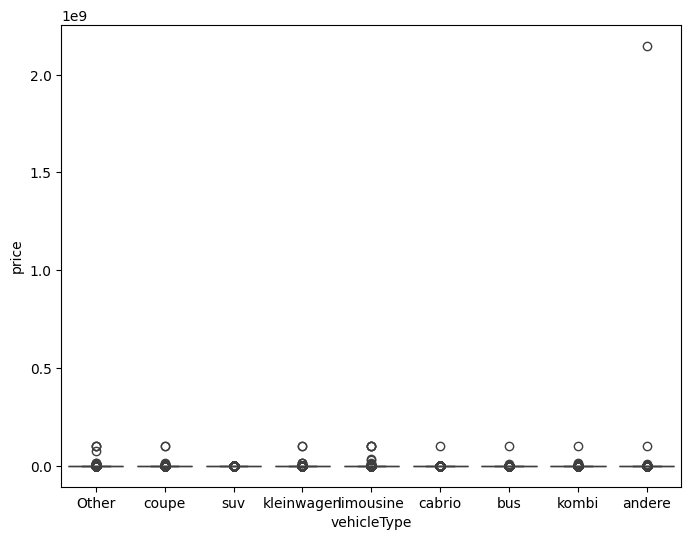

In [126]:
# box plot setup for vehicle prices across vehicle types
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()


In [127]:
# from above we can see there are a few significant outlies.
# using IQR method for outlier detection

# mean of the prices of all the vehicle types
_median = df.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

# calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr


vehicleType
Other          3708.000
andere         8429.500
bus           13948.500
cabrio        21400.000
coupe         24300.000
kleinwagen     5775.000
kombi         13076.875
limousine     12801.500
suv           28800.000
Name: price, dtype: float64

In [128]:
# removing the outliers as per the logic above
df = df[((df["vehicleType"] == "andere") & (df["price"] <= 8429)) |
        ((df["vehicleType"] == "Other") & (df["price"] <= 3708)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28800)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "bus") & (df["price"] <= 13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <= 12801)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775))]

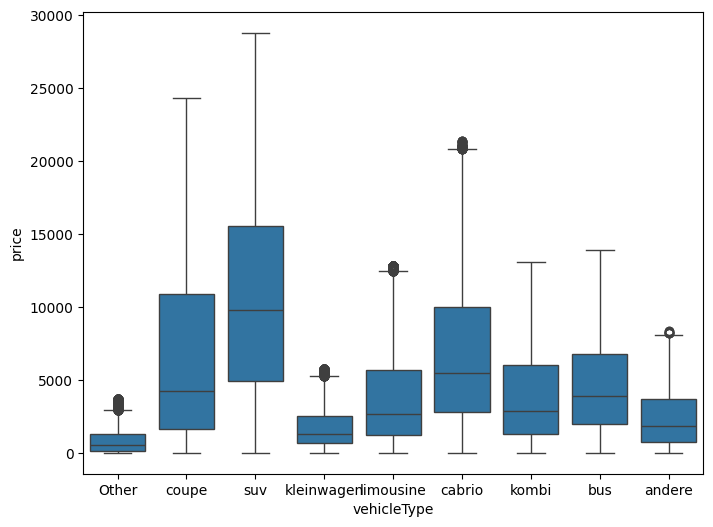

In [129]:
# checking for outliers

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()


In [130]:
# checking for unique values in column: nrOfPictures
df["nrOfPictures"].unique()

array([0], dtype=int64)

In [131]:
# dropping the column
del df["nrOfPictures"]

In [132]:
# checking for null values in column: powerPs
df["powerPS"].isnull().sum()


0

In [133]:
# checking for null values in column: notRepairedDamage
df["notRepairedDamage"].isnull().sum()

61580

In [138]:
# replacing the 'Nan' values to 'Other'
df["notRepairedDamage"].fillna("Other",inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_29912\2489724485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["notRepairedDamage"].fillna("Other",inplace=True)


In [135]:
# checking for unique values in column: notRepairedDamage
df["notRepairedDamage"].unique()

array(['Other', 'ja', 'nein'], dtype=object)

In [136]:
#translating values to English
df["notRepairedDamage"] = df["notRepairedDamage"].map({'other':'Other','ja':'Yes','nein':'No'})


In [139]:
# check
df["notRepairedDamage"].unique()

array(['Other', 'Yes', 'No'], dtype=object)

In [140]:
# checking for null values in column: model
df["model"].isnull().sum()

16609